In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
np.random.seed(1)

N_b = 10e5 # Number of background events, used in generation and in fit.
b_tau = 30. # Spoiler.

def generate_data(n_signals = 400):
    ''' 
    Generate a set of values for signal and background. Input arguement sets 
    the number of signal events, and can be varied (default to higgs-like at 
    announcement). 
    
    The background amplitude is fixed to 9e5 events, and is modelled as an exponential, 
    hard coded width. The signal is modelled as a gaussian on top (again, hard 
    coded width and mu).
    '''
    vals = []
    vals += generate_signal( n_signals, 125., 1.5)
    vals += generate_background( N_b, b_tau)
    return vals

def generate_data_change_signal(n_signals):
    ''' 
    Generate a set of values for signal and background. Input arguement sets 
    the number of signal events, and can be varied (default to higgs-like at 
    announcement). 
    
    The background amplitude is fixed to 9e5 events, and is modelled as an exponential, 
    hard coded width. The signal is modelled as a gaussian on top (again, hard 
    coded width and mu).
    '''
    vals = []
    vals += generate_signal( n_signals, 125., 1.5)
    vals += generate_background( N_b, b_tau)
    return vals

def generate_signal(N, mu, sig):
    ''' 
    Generate N values according to a gaussian distribution.
    '''
    return np.random.normal(loc = mu, scale = sig, size = N).tolist()


def generate_background(N, tau):
    ''' 
    Generate N values according to an exp distribution.
    '''
    return np.random.exponential(scale = tau, size = int(N)).tolist()


def get_B_chi(vals, mass_range, nbins, A, lamb):
    ''' 
    Calculates the chi-square value of the no-signal hypothesis (i.e background
    only) for the passed values. Need an expectation - use the analyic form, 
    using the hard coded scale of the exp. That depends on the binning, so pass 
    in as argument. The mass range must also be set - otherwise, its ignored.
    '''
    bin_heights, bin_edges = np.histogram(vals, range = mass_range, bins = nbins)
    half_bin_width = 0.5*(bin_edges[1] - bin_edges[0])
    ys_expected = get_B_expectation(bin_edges + half_bin_width, A, lamb)
    chi = 0

    # Loop over bins - all of them for now. 
    for i in range( len(bin_heights) ):
        chi_nominator = (bin_heights[i] - ys_expected[i])**2
        chi_denominator = ys_expected[i]
        chi += chi_nominator / chi_denominator
    
    return chi/float(nbins-2) # B has 2 parameters.


def get_B_expectation(xs, A, lamb):
    ''' 
    Return a set of expectation values for the background distribution for the 
    passed in x values. 
    '''
    return [A*np.exp(-x/lamb) for x in xs]


def signal_gaus(x, mu, sig, signal_amp):
    return signal_amp/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)


def get_SB_expectation(xs, A, lamb, mu, sig, signal_amp):
    ys = []
    for x in xs:
        ys.append(A*np.exp(-x/lamb) + signal_gaus(x, mu, sig, signal_amp))
    return ys

1. Generating Simulated Data

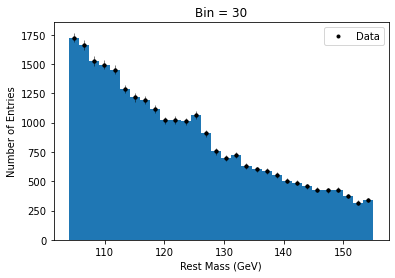

In [2]:
def loadData(bin):
    vals = generate_data()
    bin_heights, bin_edges = np.histogram(vals, range = [104.0,155.0], bins = bin)
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    return vals,centerVal,bin_heights,bin_edges

def loadDataVariableSignal(bin,n_signals):
    vals = generate_data_change_signal(n_signals)
    bin_heights, bin_edges = np.histogram(vals, range = [104.0,155.0], bins = bin)
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    return vals,centerVal,bin_heights,bin_edges

def one():
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    std = np.sqrt(bin_heights)
    plt.hist(vals, range = [104.0,155.0], bins = bin)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.title('Bin = 30')
    plt.legend()
    plt.show()
    
one()

Trying different bin values.

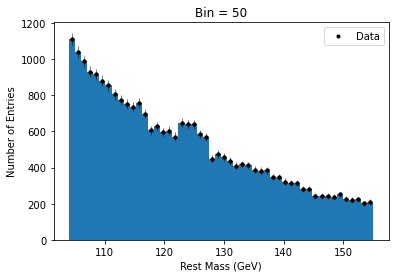

In [3]:
def one50():
    bin = 50
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    std = np.sqrt(bin_heights)
    plt.hist(vals, range = [104.0,155.0], bins = bin)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.title('Bin = 50')
    plt.legend()
    plt.show()
one50()

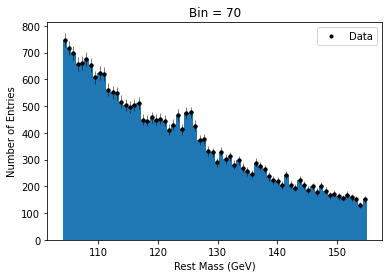

In [4]:
def one70():
    bin = 70
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    std = np.sqrt(bin_heights)
    plt.hist(vals, range = [104.0,155.0], bins = bin)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.title('Bin = 70')
    plt.legend()
    plt.show()
one70()

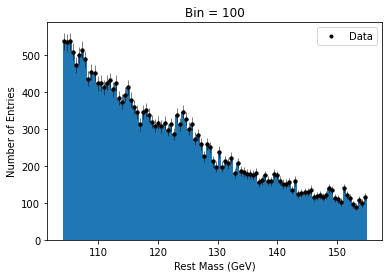

In [5]:
def one100():
    bin = 100
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    std = np.sqrt(bin_heights)
    plt.hist(vals, range = [104.0,155.0], bins = bin)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.title('Bin = 100')
    plt.legend()
    plt.show()
one100()

2. Background Parameterisation

a)

In [6]:
def twoa():
    total = 0
    length = 0 
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    length = 0
    total = 0
    for i in range(0,len(vals)):
        if(vals[i] < 120.0):
            total = total + vals[i]
            length = length + 1
    lamb = total/length
    print(total/length,"Lambda Value (Using Values below 120)")
    return lamb
twoa()

27.787229141720697 Lambda Value (Using Values below 120)


27.787229141720697

In [7]:
def twoaAllValues():
    total = 0
    length = 0 
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    length = 0
    total = 0
    for i in range(0,len(vals)):
        total = total + vals[i]
        length = length + 1
    lamb = total/length
    print(total/length,"Lambda Value (Using All Values)")
    return lamb
twoaAllValues()

30.046039659527356 Lambda Value (Using All Values)


30.046039659527356

B & C)

27.75325178057594 Lambda Value (Using Values below 120)
Total Area under Histogram 44183.0
80149 Estimated A Value


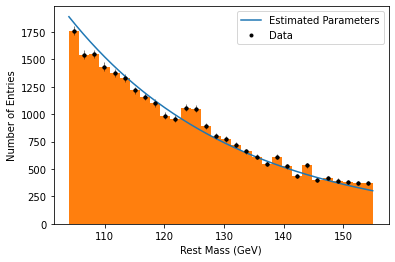

80149

In [8]:
def twob():
    fit = True
    lamb = twoa()
    totalarea = 0
    estimatedArea = 0
    AVar=50000
    step = 0.1
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    rangeVal = [104.0,155.0]
    massVal = np.arange(float(rangeVal[0]),float(rangeVal[1]),step)
    histogramWidth = (float(rangeVal[1])-float(rangeVal[0]))/(bin)

    for i in range(0,len(bin_heights)):
        totalarea = bin_heights[i]*histogramWidth + totalarea
        
    print("Total Area under Histogram",totalarea)
    while(fit):
        estimatedArea = 0
        for i in range(0,len(massVal)):
            estimatedArea = AVar*np.exp(-massVal[i]/lamb)*step+estimatedArea

        if(estimatedArea<totalarea):
            AVar = AVar +1
        else:
            AVar = AVar - 1
            fit = False

    std = np.sqrt(bin_heights)
    print(AVar,"Estimated A Value")
    plt.plot(massVal,AVar*np.exp(-massVal/lamb),label = "Estimated Parameters")
    plt.hist(vals, range = [104.0,155.0], bins = 30)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.legend()
    plt.show()
    return AVar
twob()

D) This takes a while, so maybe run this in spyder. Running this method in here, will produce different values very time.

0 A have been checked
[9999, 0, 0] where [chi,A,lamb]
5000 A have been checked
[5.236843596575129, 44999, 31.9] where [chi,A,lamb]
10000 A have been checked
[5.14148089173421, 48287, 31.27] where [chi,A,lamb]
15000 A have been checked
[5.14148089173421, 48287, 31.27] where [chi,A,lamb]
20000 A have been checked
[5.14148089173421, 48287, 31.27] where [chi,A,lamb]
25000 A have been checked
[5.14148089173421, 48287, 31.27] where [chi,A,lamb]
All A have been checked
[5.14148089173421, 48287, 31.27] Final [chi,A,lamb]


(5.14148089173421, 0)

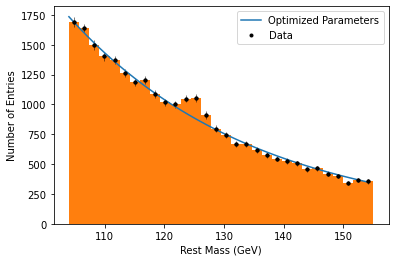

In [9]:
def twod():
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    centerVal = np.array(centerVal)
    std = np.sqrt(bin_heights)
    step = 1
    massVal = np.arange(104.0,155.0,step)
    chiArray = [9999,0,0]
    chi = 0
    A = 40000
    lamb = 29
    if(A < 0):
        A = 1
    for i in range(0,30000):
        if(i%5000 == 0):
                print(i,"A have been checked")
                print(chiArray,"where [chi,A,lamb]")
        Av = A + i
        for k in range(0,600):
            lambv = lamb +k/100
            chi = 0
            expected = Av*np.exp(-centerVal/lambv)
            for o in range(0,len(centerVal)):
                if(centerVal[o]<120):
                    chi = ((bin_heights[o]- expected[o])**2)/expected[o] + chi
            #chi = chi/float(9-2)
            if(chiArray[0]> chi):
                chiArray = [chi,Av,lambv]
    print("All A have been checked")
    print(chiArray,"Final [chi,A,lamb]")
    plt.plot(massVal,chiArray[1]*np.exp(-massVal/chiArray[2]),label = "Optimized Parameters")
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.hist(vals, range = [104.0,155.0], bins = 30)
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.legend()
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")

    n = 0
    for i in range(0,len(centerVal)):
        if(centerVal[i]<120):
            n = n +1
        
    return float(chiArray[0]),n

twod()

The unoffical but faster way of working this out, is to use the curve fit function then use the parameters given by the fit to calculate chi squared. Although the answer is not exactly the same.

In [10]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def reduceChiSquared():
    A=80000
    lamb=40
    chi = 0
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    initial_guess = [A,lamb]
    centerVal = np.array(centerVal)
    vals = np.array(vals)
    centerValNew = []
    heightbin = []
    for i in range (0,len(centerVal)):
        if (centerVal[i] < 120):
            centerValNew.append(centerVal[i])
            heightbin.append(bin_heights[i])
    centerValNew = np.array(centerValNew)
    heightbin = np.array(heightbin)
    po1,cov1 = sp.optimize.curve_fit(fit_curve,centerValNew,heightbin,initial_guess,np.sqrt(heightbin))
    expected = po1[0]*np.exp(-centerValNew/po1[1])
    for o in range(0,len(centerValNew)):
        chi = (heightbin[o]- expected[o])**2/expected[o] + chi
    print("Chi Squared Value of:", chi)
    print("For Values, A=",po1[0],"and lambda=",po1[1])
reduceChiSquared()

Chi Squared Value of: 5.06652168737474
For Values, A= 49995.52692278104 and lambda= 31.05282223492191


Chi Squared Value of estimated parameters found in part 2a and 2b.

In [11]:
def estimatedExponentialParameterChi():
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    chi = 0
    Av = 80149 
    lambv = 27.75
    centerVal = np.array(centerVal)
    expected = Av*np.exp(-centerVal/lambv)
    for i in range(0,len(centerVal)):
                if(centerVal[i]<120):
                    chi = ((bin_heights[i]- expected[i])**2)/expected[i] + chi
    print("Chi value for A = 80314, Lamb = 27.75:",chi)
estimatedExponentialParameterChi()

Chi value for A = 80314, Lamb = 27.75: 59.23448206097154


3. Goodness of Fit

As you may be aware, when generating values they are always not the same. However, in the report we need our numbers to all line up, this is why we run the method twod().

There are two options, the first option (threea()) takes alot of time as it runs twod() again. If you choose method three, you have to run it through spyder due to consistency of values. We want the reduced chi squared to be the value we got in the function twod divided by the sample-n (Degree of freedom), if the bin is 30, then the sample size will be 9 hence the degree of freedom will be 7. You may have noticed the value we found in part 2d, isn't the same as here, that is why these methods should be run in spyder.

The second option is to run method threeb(). This is much faster as you manually enter the values found in twod() and it will return the reduce chi squared value.

We will use A and lambda values from 2d has they return smaller chi squared values.

In [ ]:
def twodReturnTwoValues():
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    centerVal = np.array(centerVal)
    std = np.sqrt(bin_heights)
    step = 1
    massVal = np.arange(104.0,155.0,step)
    chiArray = [9999,0,0]
    chi = 0
    A = 40000
    lamb = 29
    if(A < 0):
        A = 1
    for i in range(0,30000):
        if(i%5000 == 0):
                print(i,"A have been checked")
                print(chiArray,"where [chi,A,lamb]")
        Av = A + i
        for k in range(0,600):
            lambv = lamb +k/100
            chi = 0
            expected = Av*np.exp(-centerVal/lambv)
            for o in range(0,len(centerVal)):
                chi = ((bin_heights[o]- expected[o])**2)/expected[o] + chi
            if(chiArray[0]> chi):
                chiArray = [chi,Av,lambv]
    print("All A have been checked")
    print(chiArray,"Final [chi,A,lamb]")
    n = 0
    for i in range(0,len(centerVal)):
        if(centerVal[o]<120):
            n = n +1
        
    return float(chiArray[0]),n

def threea():
    chiSquared,n = twodReturnTwoValues()
    print("The Reduced Chi squared value is:",chiSquared/(n-2))
threea()

0 A have been checked
[9999, 0, 0] where [chi,A,lamb]


In [ ]:
def threeb():
    chiSquared = float(input("What was your chi squared value found in 2d? "))
    n = float(input("What was the sample size in 2d? "))
    print("The Reduced Chi squared value is:",chiSquared/(n-2))
threeb()

4. Hypothesis Testing

A)

In [ ]:
def foura():
    vals,centerVal,bin_heights,bin_edges = loadData(30)
    expected = Av*np.exp(-centerVal/lambv)
    Av = float(input("What is your estimated A Value? from 2d "))
    lambv = float(input("What is your estimated Lambda Value? from 2d "))
    for o in range(0,len(centerVal)):
        chi = ((bin_heights[o]- expected[o])**2)/expected[o] + chi
    print("The chi value is:",chi)
    print("The reduced chi value is:",chi/(len(centerVal)-2))
foura()

B)

This method is very slow, I would not recommend using this.

In [ ]:
def twodReturnFourValues():
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    centerVal = np.array(centerVal)
    std = np.sqrt(bin_heights)
    step = 1
    massVal = np.arange(104.0,155.0,step)
    chiArray = [9999,0,0]
    chi = 0
    A = 40000
    lamb = 29
    if(A < 0):
        A = 1
    for i in range(0,30000):
        if(i%5000 == 0):
                print(i,"A have been checked")
                print(chiArray,"where [chi,A,lamb]")
        Av = A + i
        for k in range(0,600):
            lambv = lamb +k/100
            chi = 0
            expected = Av*np.exp(-centerVal/lambv)
            for o in range(0,len(centerVal)):
                chi = ((bin_heights[o]- expected[o])**2)/expected[o] + chi
            #chi = chi/float(9-2)
            if(chiArray[0]> chi):
                chiArray = [chi,Av,lambv]
    print("All A have been checked")
    print(chiArray,"Final [chi,A,lamb]")
    n = 0
    for i in range(0,len(centerVal)):
        if(centerVal[o]<120):
            n = n +1
        
    return float(chiArray[0])

def chicurvefit(x,k,A):
    curve = A*(x**(k/2-1)*np.exp(-x/2))/(2**(k/2)*sp.special.gamma(k/2))
    return curve

def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10k0signal():
    chiArray = []
    bin = 30
    for i in range(0,10000):
        chi = 0
        if(i%1000 == 0):
            print("Finished Running",i,"Simulations out of 10000")
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,0)
        print(i,"Tik Count")
        centerVal = np.array(centerVal)
        chi = twodtemp(A,lamb,centerVal,bin_heights)
        chiArray.append(chi)
    np.savetxt("10kBackgroundFullBackground.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,100], bins = 33,histtype = 'step', label = "$\chi^2$ (Signal = 0) (Bin = 33)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    initial_guess = [26,400000]
    po1,cov1 = sp.optimize.curve_fit(chicurvefit,centerVal,bin_heights,initial_guess)
    print(po1[0]," - Estimated number of freedom")
    print(po1[1])
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.plot(massVal,po1[1]*(massVal**(po1[0]/2-1)*np.exp(-massVal/2))/(2**(po1[0]/2)*sp.special.gamma(po1[0]/2)),color = 'red', label = "$\chi^2$ fit (k = "+str(int(po1[0]))+")")
    plt.xlabel('$\chi^(2)$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10k0signal()

This is an unoffical way, but manages to do it faster.

In [ ]:
def chicurvefit(x,k,A):
    curve = A*(x**(k/2-1)*np.exp(-x/2))/(2**(k/2)*sp.special.gamma(k/2))
    return curve

def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast0Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    massVal = np.arange(0,100,1)
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,0)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackgroundFullBackground.csv", chiArray, delimiter=",")
    r = plt.figure(2)
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,100], bins = 30,histtype = 'step', label = "$\chi^2$ (Signal = 0) (Bin = 30)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    initial_guess = [26,400000]
    po1,cov1 = sp.optimize.curve_fit(chicurvefit,centerVal,bin_heights,initial_guess)
    print("The Degree of Freedom is:",po1[0])
    print("The scale value is:",po1[1])
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.plot(massVal,po1[1]*(massVal**(po1[0]/2-1)*np.exp(-massVal/2))/(2**(po1[0]/2)*sp.special.gamma(po1[0]/2)),color = 'red', label = "$\chi^2$ fit (k = "+str(int(po1[0]))+")")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast0Signal()

C)

Signal = 100

In [ ]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast100Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,100)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackground_Signal100.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,100], bins = 33,histtype = 'step', label = "$\chi^2$ (Signal = 100) (Bin = 33)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast100Signal()

Signal = 200

In [ ]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast200Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,200)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackground_Signal200.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,120], bins = 45,histtype = 'step', label = "$\chi^2$ (Signal = 200) (Bin = 45)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast200Signal()

Signal = 300

In [ ]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast300Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,300)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackground_Signal300.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,170], bins = 60,histtype = 'step', label = "$\chi^2$ (Signal = 300) (Bin = 60)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast300Signal()

Signal = 400

In [ ]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast400Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,400)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackground_Signal400.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,200], bins = 65,histtype = 'step', label = "$\chi^2$ (Signal = 400) (Bin = 65)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast400Signal()

Through Trial and Error the signal 226 gives us a p = 0.05, which is a chi square of 41.34. 

In [ ]:
def fit_curve(x,A,lamb):
    curve = A*np.exp(-x/lamb)
    return curve

def chi10kFast226Signal():
    chiArray = []
    A=40000
    lamb=40
    initial_guess = [A,lamb]
    bin = 30
    for i in range(0,10000):
        if(i%1000 ==0):
            print("Finished Running",i,"Simulations out of 10000")
        chi = 0
        vals,centerVal,bin_heights,bin_edges = loadDataVariableSignal(bin,226)
        centerVal = np.array(centerVal)
        po1,cov1 = sp.optimize.curve_fit(fit_curve,centerVal,bin_heights,initial_guess,np.sqrt(bin_heights))
        expected = po1[0]*np.exp(-centerVal/po1[1])
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    np.savetxt("10kBackground_Signal226.csv", chiArray, delimiter=",")
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,150], bins = 40,histtype = 'step', label = "$\chi^2$ (Signal = 226) (Bin = 40)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
chi10kFast226Signal()

To save time, this method just loads data for each signal and plots it as an historgram. Make sure to change the bin and range values to your desired look, also update the labels.

In [ ]:
def histogram():
    chiArray = np.loadtxt("10kBackground_Signal226.csv",delimiter=',', unpack=True)
    bin_heights, bin_edges, patches = plt.hist(chiArray, range = [0,150], bins = 40,histtype = 'step', label = "$\chi^2$ (Signal = 226) (Bin = 40)")
    centerVal = []
    for i in range(0,len(bin_edges)-1):
        midVal = (bin_edges[i]+bin_edges[i+1])*0.5
        centerVal.append(midVal)
    centerVal = np.array(centerVal)
    plt.errorbar(centerVal, bin_heights, yerr=np.sqrt(bin_heights), fmt='.', color = "black",linewidth=1)
    plt.plot(centerVal,bin_heights,'.', label = "Data",color = "black")
    plt.xlabel('$\chi^2$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
histogram()

5. Signal Estimation

A)

In [ ]:
def fullCurveFit(x,m,sigVal,A,a,lamb):
    curve = a*np.exp(-x/lamb)+signal_gaus(x,m,sigVal,A)
    return curve

def fivea():
    chi = 0
    Av = float(input("What is your estimated A Value? from 2d "))
    lambv = float(input("What is your estimated Lambda Value? from 2d "))
    A_Signal = 700
    mu = 125
    sig = 1.5
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    centerVal = np.array(centerVal)
    expected = fullCurveFit(centerVal,mu,sig,A_Signal,Av,lambv)
    std = np.sqrt(bin_heights)
    for o in range(0,len(centerVal)):
        chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
    print("The chi squared Value is", chi)
    print("The reduced chi squared Value is", chi/(len(centerVal)-5))
    stdReduceChi = 0
    for o in range(0,len(centerVal)):
        stdReduceChi = (bin_heights[o]- expected[o])**2/(std[o])**2 + stdReduceChi
    print("The sigma reduced chi squared Value is", stdReduceChi/(len(centerVal)-5))
    massVal = np.arange(104.0,155.0,0.1)
    plt.plot(massVal,fullCurveFit(massVal,mu,sig,A_Signal,Av,lambv),label = "Estimated Parameters")
    plt.hist(vals, range = [104.0,155.0], bins = 30)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.legend()
    plt.show()
fivea()

B)

Optimize parameters: To get the same result every time, run the method in spyder. I decided to use scipy for this as it would take very long if I used the chi squared method to loop over every combination of parameters.

In [ ]:
def fiveaOptimize():
    chi = 0
    initial_guess = [125,10,1000,70000,33]
    bin = 30
    vals,centerVal,bin_heights,bin_edges = loadData(bin)
    centerVal = np.array(centerVal)
    po1,cov1 = sp.optimize.curve_fit(fullCurveFit,centerVal,bin_heights,initial_guess)
    expected = fullCurveFit(centerVal,po1[0],po1[1],po1[2],po1[3],po1[4])
    std = np.sqrt(bin_heights)
    for o in range(0,len(centerVal)):
        chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
    print("The chi squared Value is", chi)
    print("The reduced chi squared Value is", chi/(len(centerVal)-5))
    stdReduceChi = 0
    for o in range(0,len(centerVal)):
        stdReduceChi = (bin_heights[o]- expected[o])**2/(std[o])**2 + stdReduceChi
    print("The sigma reduced chi squared Value is", stdReduceChi/(len(centerVal)-5))
    massVal = np.arange(104.0,155.0,0.1)
    print("mu:",po1[0]," Sigma:",po1[1]," Gaussian Scale:",po1[2]," Expotenial Scale:",po1[3]," Lambda:",po1[4])
    plt.plot(massVal,fullCurveFit(massVal,po1[0],po1[1],po1[2],po1[3],po1[4]),label = "Estimated Parameters")
    plt.hist(vals, range = [104.0,155.0], bins = 30)
    plt.plot(centerVal,bin_heights,".", label = "Data",color = "black")
    plt.errorbar(centerVal, bin_heights, yerr=std, fmt='.', color = "black",linewidth=0.5)
    plt.xlabel("Rest Mass (GeV)")
    plt.ylabel("Number of Entries")
    plt.legend()
    plt.show()
fiveaOptimize()

C)

In [ ]:
def fullCurveFit(x,m,sigVal,A,a,lamb):
    curve = a*np.exp(-x/lamb)+signal_gaus(x,m,sigVal,A)
    return curve

def fivec():
    sig =float(input("What was the sigma value in 5b? "))
    AGaus =float(input("What was the Gaussian Scale value in 5b? "))
    AExpo =float(input("What was the Expotenial Scale value in 5b? "))
    lamb =float(input("What was the Lambda value in 5b? "))
    mass = np.arange(104,155,1)
    chiArray = []
    vals,centerVal,bin_heights,bin_edges = fasterData()
    centerVal = np.array(centerVal)
    for i in range(104,155):
        chi = 0
        expected = fullCurveFit(centerVal,i,sig,AGaus,AExpo,lamb)
        for o in range(0,len(centerVal)):
            chi = (bin_heights[o]- expected[o])**2/expected[o] + chi
        chiArray.append(chi)
    plt.plot(mass,chiArray,".")
    plt.xlabel('Rest Mass (Gev)')
    plt.ylabel('$\chi^2$')
    plt.show()